<h2>This Notebook Will Be Mainly Used For The Applied Data Science Capstone Project.
</h2>

In [16]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn.utils import resample
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
data = pd.read_csv('desktop\Data-Collisions.csv')
data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [3]:
data.describe(include=np.object)


,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1780512,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


In [4]:
data['ROADCOND'].isnull().sum(axis = 0)

5012

In [5]:
len(data)

194673

In [6]:
data.shape

(194673, 38)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [8]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [9]:
df = data[['SEVERITYCODE','WEATHER','LIGHTCOND','ROADCOND']]
df

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet
5,1,Clear,Daylight,Dry
6,1,Raining,Daylight,Wet
7,2,Clear,Daylight,Dry
8,1,Clear,Daylight,Dry
9,2,Clear,Daylight,Dry


In [10]:
data[['WEATHER']].drop_duplicates().dropna()

,WEATHER
0,Overcast
1,Raining
3,Clear
19,Unknown
34,Other
290,Snowing
706,Fog/Smog/Smoke
799,Sleet/Hail/Freezing Rain
2238,Blowing Sand/Dirt
10601,Severe Crosswind


In [11]:
df[df['WEATHER'].isnull()].head(5)


,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
15,1,NaN,NaN,NaN
36,1,NaN,NaN,NaN
53,2,NaN,NaN,NaN
60,1,NaN,NaN,NaN
75,1,NaN,NaN,NaN


In [12]:

print('Number of entries before dropping na values : '+str(df.shape[0]))
df.dropna(inplace=True)
print('Number of entries after dropping na values : '+str(df.shape[0]))


Number of entries before dropping na values : 194673
Number of entries after dropping na values : 189337


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df.groupby('SEVERITYCODE').size()


SEVERITYCODE
1    132285
2     57052
dtype: int64

In [17]:
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=57052,   
                                 random_state=123)
 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 


In [18]:
df_f=df_downsampled[['WEATHER','LIGHTCOND','ROADCOND']]



In [19]:
df_2=df_downsampled.set_index('SEVERITYCODE').drop(1)
df_1=df_downsampled.set_index('SEVERITYCODE').drop(2)

In [20]:
df_w= df_downsampled.groupby(['WEATHER'])['SEVERITYCODE'].value_counts().to_frame()
df_w.unstack()

SEVERITYCODE       
SEVERITYCODE                        1      2
WEATHER                                     
Blowing Sand/Dirt                  15     15
Clear                           32440  35808
Fog/Smog/Smoke                    150    187
Other                             319    116
Overcast                         8212   8739
Partly Cloudy                       1      3
Raining                          9451  11168
Severe Crosswind                    6      7
Sleet/Hail/Freezing Rain           43     28
Snowing                           331    169
Unknown                          6084    812

In [21]:
df_weathert= df_downsampled['WEATHER'].value_counts().to_frame()
df_weathert

,WEATHER
Clear,68248
Raining,20619
Overcast,16951
Unknown,6896
Snowing,500
Other,435
Fog/Smog/Smoke,337
Sleet/Hail/Freezing Rain,71
Blowing Sand/Dirt,30
Severe Crosswind,13


In [22]:
df_weathert.WEATHER.to_list()

[68248, 20619, 16951, 6896, 500, 435, 337, 71, 30, 13, 4]

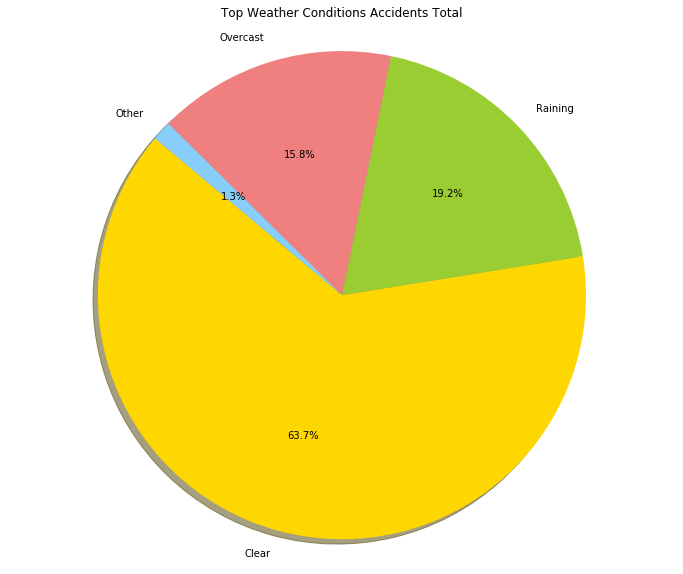

In [23]:
wt_label=['Clear',
 'Raining',
 'Overcast',
 'Other']
wt=[68248, 20619, 16951, 500+435+337+71+30+13+4]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(12, 10)).gca().pie(wt, labels=wt_label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Weather Conditions Accidents Total')

plt.show()

In [24]:
df_w1=df_1['WEATHER'].value_counts().to_frame()
df_w1

,WEATHER
Clear,32440
Raining,9451
Overcast,8212
Unknown,6084
Snowing,331
Other,319
Fog/Smog/Smoke,150
Sleet/Hail/Freezing Rain,43
Blowing Sand/Dirt,15
Severe Crosswind,6


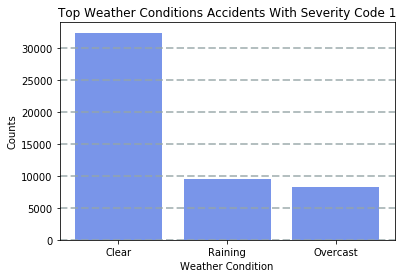

In [25]:
labels=['Clear','Raining','Overcast']

w1=[32440,9451,8212]
plt.bar(labels, w1, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Weather Condition')
plt.ylabel('Counts')
plt.title('Top Weather Conditions Accidents With Severity Code 1')
plt.show()

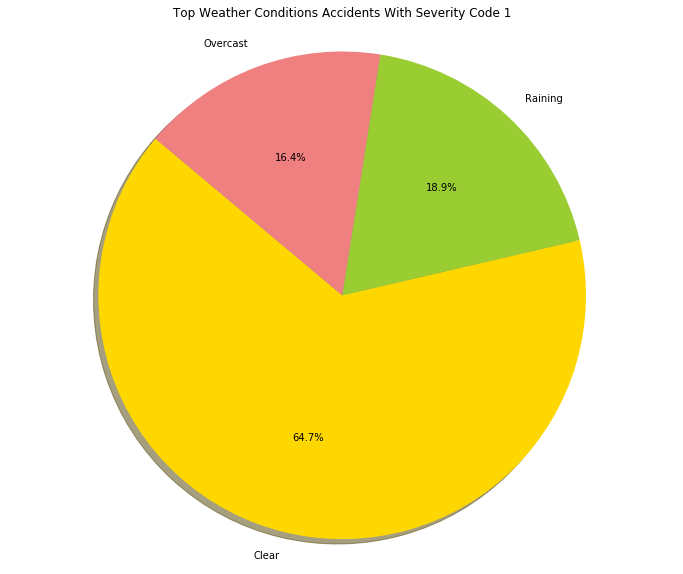

In [26]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(12, 10)).gca().pie(w1, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Weather Conditions Accidents With Severity Code 1')

plt.show()

In [27]:
df_w2=df_2['WEATHER'].value_counts().to_frame()
df_w2

,WEATHER
Clear,35808
Raining,11168
Overcast,8739
Unknown,812
Fog/Smog/Smoke,187
Snowing,169
Other,116
Sleet/Hail/Freezing Rain,28
Blowing Sand/Dirt,15
Severe Crosswind,7


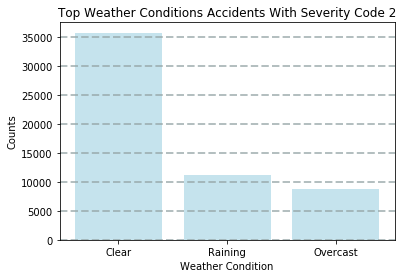

In [28]:

w2=[35808,11168,8739]
plt.bar(labels, w2, color='lightblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Weather Condition')
plt.ylabel('Counts')
plt.title('Top Weather Conditions Accidents With Severity Code 2')
plt.show()

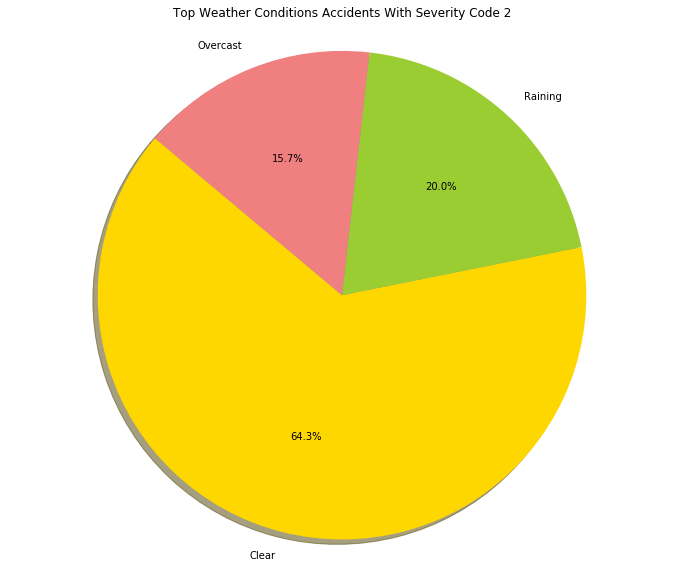

In [29]:
plt.figure(figsize=(12, 10)).gca().pie(w2, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Weather Conditions Accidents With Severity Code 2')

plt.show()

In [30]:
df_lightt= df_f['LIGHTCOND'].value_counts().to_frame()
df_lightt

,LIGHTCOND
Daylight,71980
Dark - Street Lights On,29104
Unknown,6087
Dusk,3713
Dawn,1564
Dark - No Street Lights,838
Dark - Street Lights Off,683
Other,128
Dark - Unknown Lighting,7


In [31]:
df_lightt.index.to_list()

['Daylight',
 'Dark - Street Lights On',
 'Unknown',
 'Dusk',
 'Dawn',
 'Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Other',
 'Dark - Unknown Lighting']

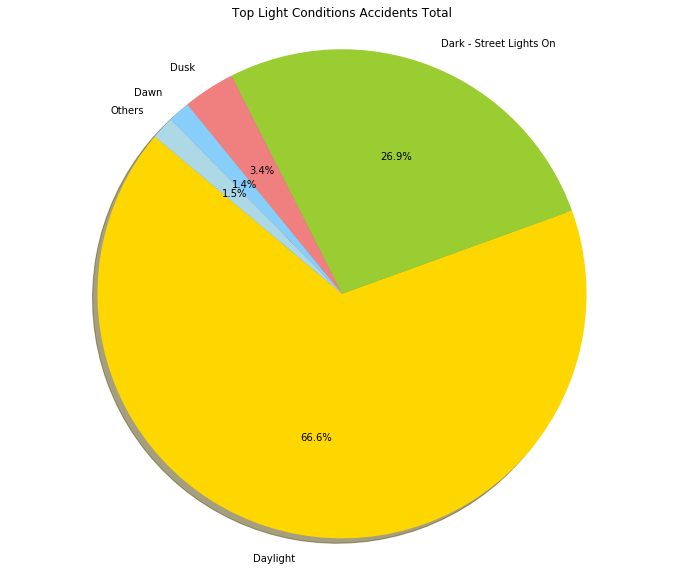

In [32]:
lt_labels=['Daylight',
 'Dark - Street Lights On',
 'Dusk',
 'Dawn','Others']
lt=[71980, 29104, 3713, 1564, 838+ 683+ 128+ 7]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightblue']

plt.figure(figsize=(12, 10)).gca().pie(lt, labels=lt_labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Light Conditions Accidents Total')

plt.show()

In [33]:
df_l= df_downsampled.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts().to_frame()
df_l.unstack()


SEVERITYCODE       
SEVERITYCODE                        1      2
LIGHTCOND                                   
Dark - No Street Lights           504    334
Dark - Street Lights Off          367    316
Dark - Street Lights On         14653  14451
Dark - Unknown Lighting             3      4
Dawn                              740    824
Daylight                        33452  38528
Dusk                             1775   1938
Other                              76     52
Unknown                          5482    605

In [34]:
df_l1=df_1['LIGHTCOND'].value_counts().to_frame()
df_l1

,LIGHTCOND
Daylight,33452
Dark - Street Lights On,14653
Unknown,5482
Dusk,1775
Dawn,740
Dark - No Street Lights,504
Dark - Street Lights Off,367
Other,76
Dark - Unknown Lighting,3


In [35]:
df_l1.reset_index()
df_l1.index.to_list()

['Daylight',
 'Dark - Street Lights On',
 'Unknown',
 'Dusk',
 'Dawn',
 'Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Other',
 'Dark - Unknown Lighting']

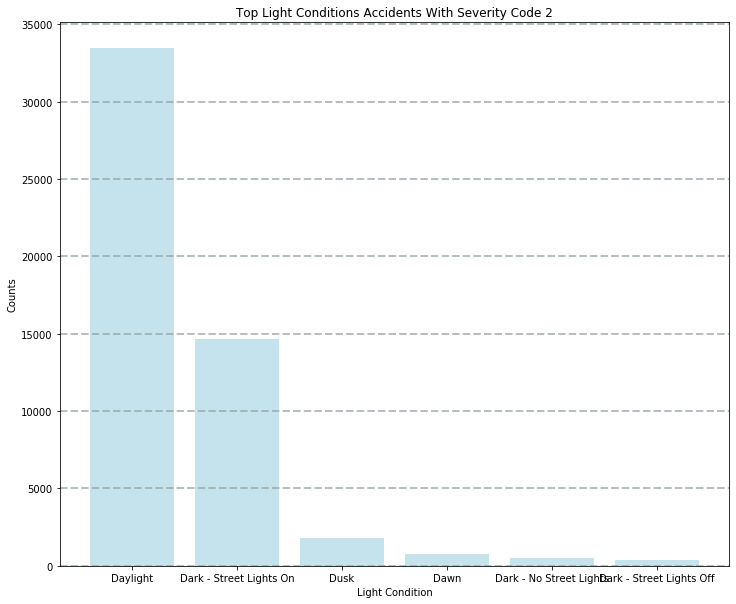

In [36]:
l_labels=['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights', 'Dark - Street Lights Off']
l1=[33452, 14653, 1775, 740, 504, 367]
plt.figure(figsize=(12, 10)).gca().bar(l_labels, l1, color='lightblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Light Condition')
plt.ylabel('Counts')
plt.title('Top Light Conditions Accidents With Severity Code 2')
plt.show()

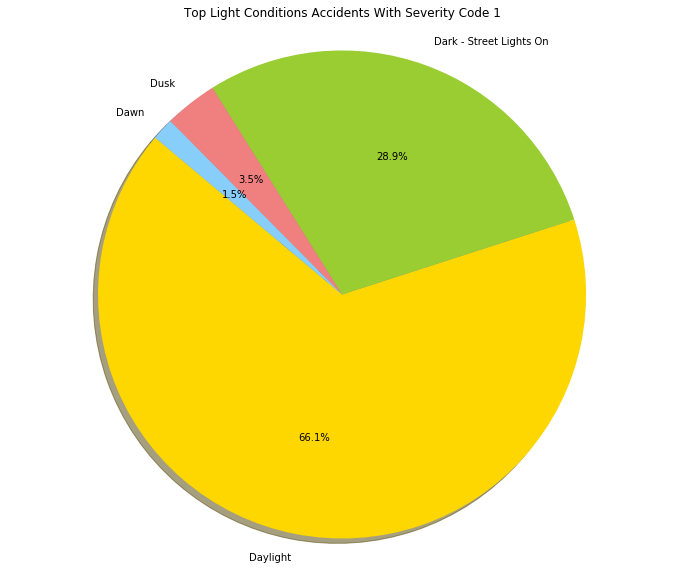

In [37]:
l_labels=['Daylight','Dark - Street Lights On','Dusk','Dawn']
l1=[33452, 14653, 1775, 740]

plt.figure(figsize=(12, 10)).gca().pie(l1, labels=l_labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Light Conditions Accidents With Severity Code 1')

plt.show()

In [38]:
df_l2=df_2['LIGHTCOND'].value_counts().to_frame()
df_l2

,LIGHTCOND
Daylight,38528
Dark - Street Lights On,14451
Dusk,1938
Dawn,824
Unknown,605
Dark - No Street Lights,334
Dark - Street Lights Off,316
Other,52
Dark - Unknown Lighting,4


In [39]:
df_l1.reset_index()
df_l1.index.to_list()
df_l2['LIGHTCOND'].to_list()

[38528, 14451, 1938, 824, 605, 334, 316, 52, 4]

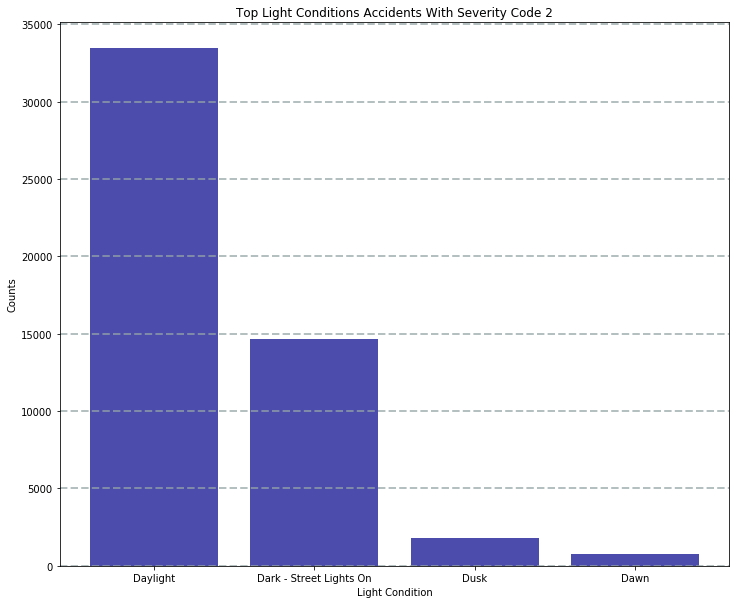

In [40]:
l2=[38528, 14451, 1938, 824, 334, 316]

plt.figure(figsize=(12, 10)).gca().bar(l_labels, l1, color='darkblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Light Condition')
plt.ylabel('Counts')
plt.title('Top Light Conditions Accidents With Severity Code 2')
plt.show()

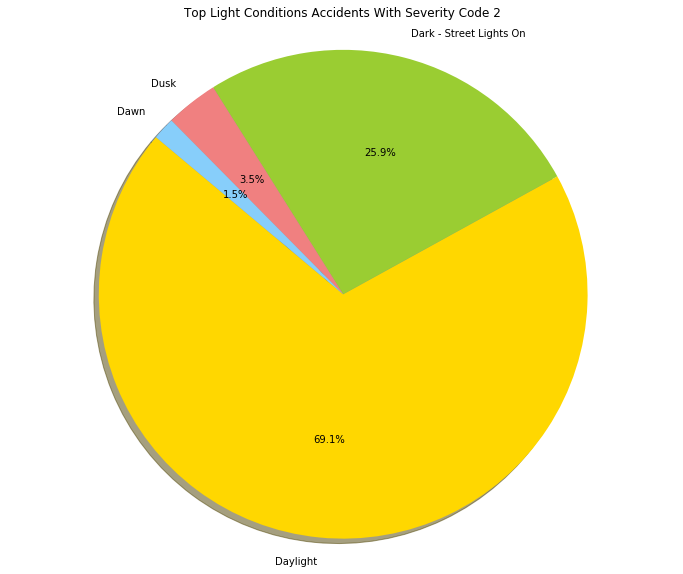

In [41]:
l2=[38528, 14451, 1938, 824]
plt.figure(figsize=(12, 10)).gca().pie(l2, labels=l_labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Light Conditions Accidents With Severity Code 2')

plt.show()

In [42]:
df_roadt= df_f['ROADCOND'].value_counts().to_frame()
df_roadt

,ROADCOND
Dry,76368
Wet,29449
Unknown,6850
Ice,670
Snow/Slush,538
Other,78
Standing Water,67
Oil,43
Sand/Mud/Dirt,41


In [43]:
df_roadt.ROADCOND.to_list()

[76368, 29449, 6850, 670, 538, 78, 67, 43, 41]

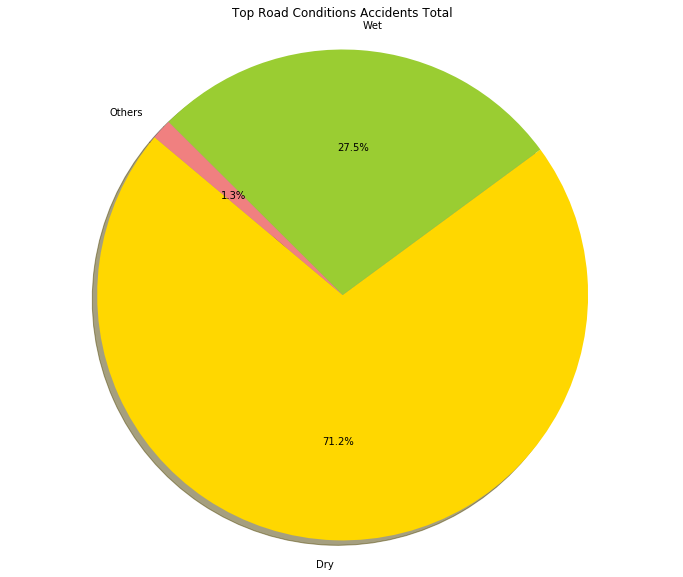

In [44]:
rt_labels=['Dry','Wet','Others']
rt=[76368, 29449, 670+ 538+ 78+ 67+ 43+ 41]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightblue']

plt.figure(figsize=(12, 10)).gca().pie(rt, labels=rt_labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Road Conditions Accidents Total')

plt.show()

In [45]:
df_r= df_downsampled.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts().to_frame()
df_r.unstack()

SEVERITYCODE       
SEVERITYCODE              1      2
ROADCOND                          
Dry                   36364  40004
Ice                     397    273
Oil                      19     24
Other                    35     43
Sand/Mud/Dirt            18     23
Snow/Slush              372    166
Standing Water           37     30
Unknown                6103    747
Wet                   13707  15742

In [46]:
df_r1=df_1['ROADCOND'].value_counts().to_frame()
df_r1

,ROADCOND
Dry,36364
Wet,13707
Unknown,6103
Ice,397
Snow/Slush,372
Standing Water,37
Other,35
Oil,19
Sand/Mud/Dirt,18


In [47]:
df_r1['ROADCOND'].to_list()

[36364, 13707, 6103, 397, 372, 37, 35, 19, 18]

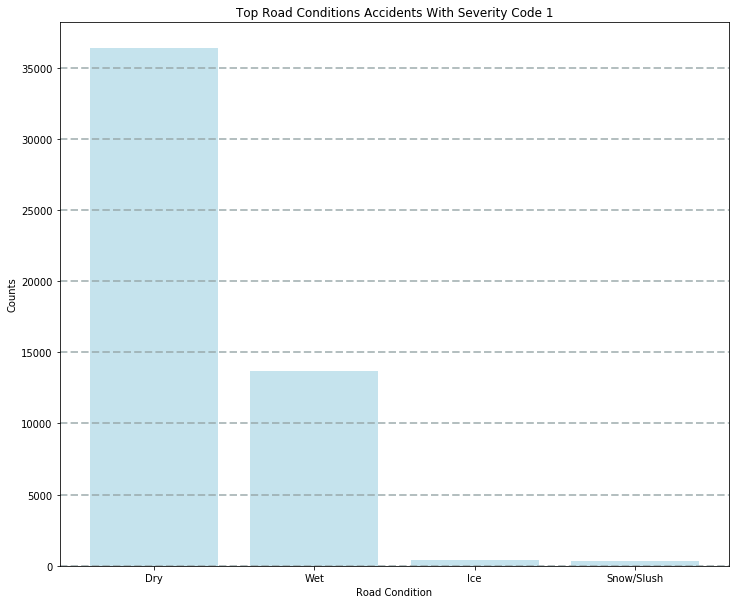

In [48]:
r_labels=['Dry',
 'Wet',
 'Ice',
 'Snow/Slush']
r1=[36364, 13707, 397, 372]
plt.figure(figsize=(12, 10)).gca().bar(r_labels, r1, color='lightblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Road Condition')
plt.ylabel('Counts')
plt.title('Top Road Conditions Accidents With Severity Code 1')
plt.show()

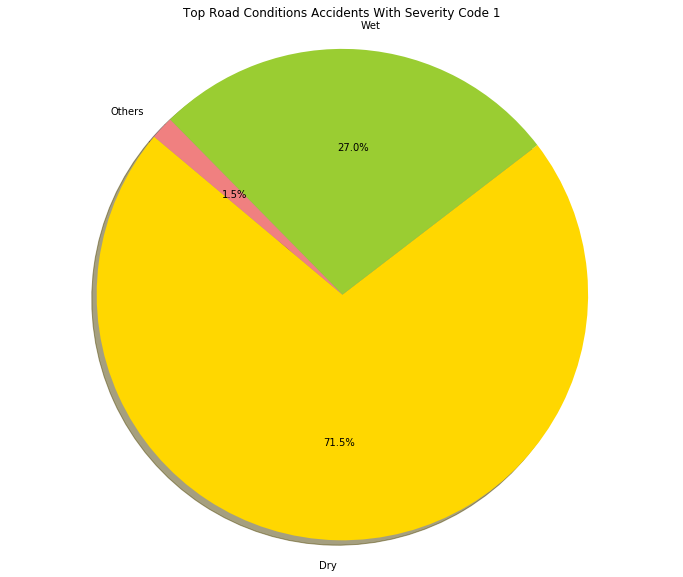

In [49]:
pr=['Dry','Wet','Others']
pr1=[36364, 13707, 397+ 372]
plt.figure(figsize=(12, 10)).gca().pie(pr1, labels=pr, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Road Conditions Accidents With Severity Code 1')

plt.show()

In [50]:
df_r2=df_2['ROADCOND'].value_counts().to_frame()
df_r2

,ROADCOND
Dry,40004
Wet,15742
Unknown,747
Ice,273
Snow/Slush,166
Other,43
Standing Water,30
Oil,24
Sand/Mud/Dirt,23


In [51]:
df_r2.ROADCOND.to_list()

[40004, 15742, 747, 273, 166, 43, 30, 24, 23]

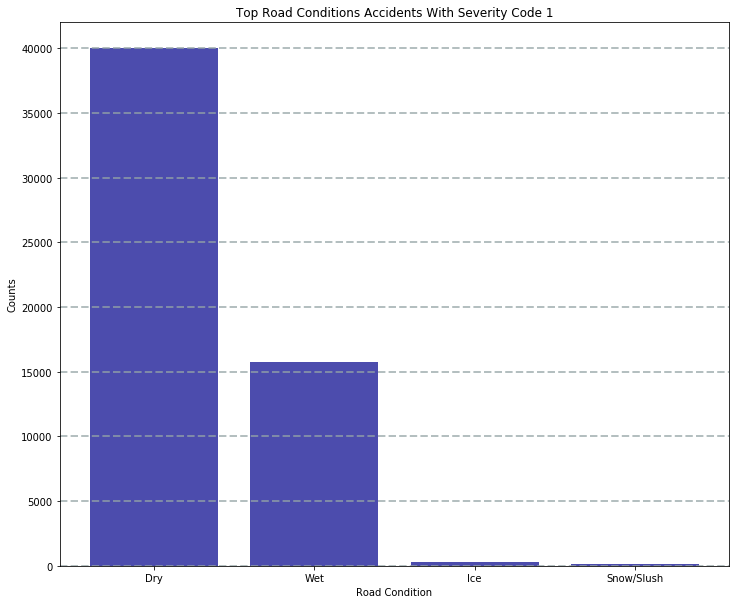

In [52]:
r2=[40004, 15742, 273, 166]
plt.figure(figsize=(12, 10)).gca().bar(r_labels, r2, color='darkblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Road Condition')
plt.ylabel('Counts')
plt.title('Top Road Conditions Accidents With Severity Code 1')
plt.show()

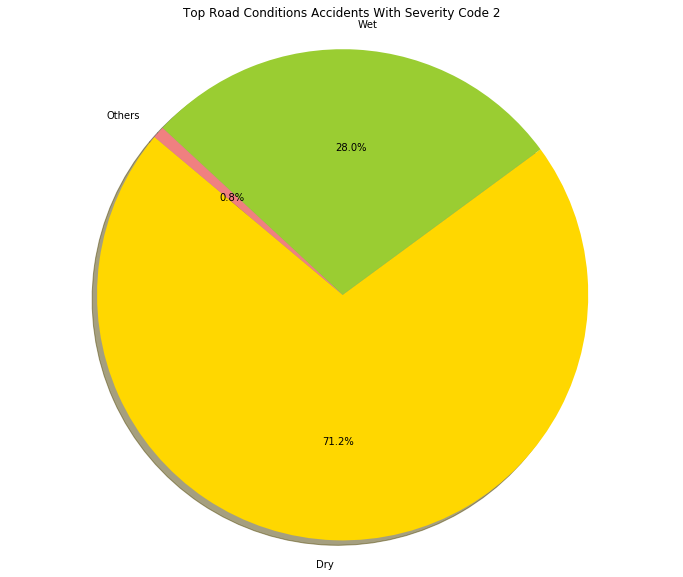

In [53]:
pr2=[40004, 15742, 273+ 166]
plt.figure(figsize=(12, 10)).gca().pie(pr2, labels=pr, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Top Road Conditions Accidents With Severity Code 2')

plt.show()